In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

df = pd.read_csv('bodyPerformance.csv')
len_row, len_col = df.shape
df.fillna(df.mode().iloc[0], inplace=True) # Replace NaN values with mode of corresponding column
# use the factorize() function to convert the column of strings to integers
non_int_columns = df.select_dtypes(include=['object']).columns.tolist()
    
# Delete duplicate rows
df = df.drop_duplicates()

In [2]:
print(len_row, len_col)

100 37


In [2]:
label_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

df['Target'] = df['Target'].replace(label_mapping)

In [2]:
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

df['class'] = df['class'].replace(label_mapping)

label_mapping = {'M': 1, 'F': 2}

df['gender'] = df['gender'].replace(label_mapping)

In [3]:
df = df.iloc[:, 1:]

In [113]:
df = df.drop(['stdevy135','korelasi135'], axis=1)

In [3]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [5]:
# Membaca data
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1])

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the dataset
scaler.fit(X)

# Transform the dataset using the scaler
X_std = scaler.transform(X)

In [6]:
%run func.ipynb

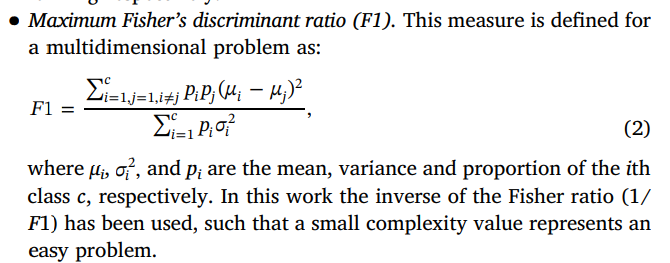

In [7]:
def calculate_F1(X, y):
    c = len(np.unique(y))  # Number of classes
    means = np.zeros(c)  # Array to store means of each class
    variances = np.zeros(c)  # Array to store variances of each class
    proportions = np.zeros(c)  # Array to store proportions of each class
    
    # Calculate means, variances, and proportions of each class
    for i in range(c):
        means[i] = np.mean(X[y == i])
        
        variances[i] = np.var(X[y == i])
        
        proportions[i] = np.sum(y == i) / len(y)
    numerator = 0.0
    denominator = 0.0

    # Calculate numerator and denominator of F1
    for i in range(c):
        for j in range(c):
            if i != j:
                numerator += proportions[i] * proportions[j] * (means[i] - means[j]) ** 2

        denominator += proportions[i] * variances[i]
    F1 = numerator / denominator
    return F1

# Calculating the F1 score
F1_score = calculate_F1(X_std, y)

print("Maximum Fisher's discriminant ratio (F1):", F1_score)

Maximum Fisher's discriminant ratio (F1): 0.009551998997520652


In [34]:
column_arrays = df.transpose().values

print(column_arrays)

[[1.45878641e+02 1.57544397e+02 1.22033879e+02 ... 1.71841525e+02
  1.51539138e+02 1.47169094e+02]
 [2.82061479e-02 3.12884612e-02 2.32709904e-02 ... 2.57698915e-02
  2.45978019e-02 2.71611350e-02]
 [4.28264494e+01 4.51057889e+01 3.88998220e+01 ... 4.09351584e+01
  3.99934003e+01 4.20256208e+01]
 ...
 [6.50204418e+00 5.36804456e+00 6.61965375e+00 ... 5.77267129e+00
  5.66878572e+00 5.74624532e+00]
 [4.05498418e-02 1.22249152e-01 2.98247862e-02 ... 7.26712233e-02
  8.22629697e-02 7.89176484e-02]
 [0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 2.00000000e+00
  3.00000000e+00 4.00000000e+00]]


In [35]:
for i in range(len(column_names)):
    F1_score = calculate_F1(column_arrays[i], y)
    print(i+1, "Maximum Fisher's discriminant ratio (F1):", F1_score)

1 Maximum Fisher's discriminant ratio (F1): 0.29448355200471843
2 Maximum Fisher's discriminant ratio (F1): 0.23832457265468002
3 Maximum Fisher's discriminant ratio (F1): 0.24931317645990336
4 Maximum Fisher's discriminant ratio (F1): 0.3047848412962319
5 Maximum Fisher's discriminant ratio (F1): 0.27836008873406287
6 Maximum Fisher's discriminant ratio (F1): 0.23500624837914844
7 Maximum Fisher's discriminant ratio (F1): 0.24087791708642284
8 Maximum Fisher's discriminant ratio (F1): 0.37159099871605084
9 Maximum Fisher's discriminant ratio (F1): 0.29627700463572987
10 Maximum Fisher's discriminant ratio (F1): 0.05640707206085828
11 Maximum Fisher's discriminant ratio (F1): 0.08677761388755435
12 Maximum Fisher's discriminant ratio (F1): 0.15018955276344614
13 Maximum Fisher's discriminant ratio (F1): 0.26936958040109793
14 Maximum Fisher's discriminant ratio (F1): 0.37159099871605084
15 Maximum Fisher's discriminant ratio (F1): 0.495910358476625
16 Maximum Fisher's discriminant rati

<ipython-input-24-2dac0cf5f7ce>:24: RuntimeWarning: invalid value encountered in double_scalars
  F1 = numerator / denominator


In [8]:
# Assuming X_std and y are defined
feature_weights = reliefF(X_std, y)

In [9]:
combines = {'Features': df.iloc[:, :-1].columns, 'Weights': feature_weights}
weight_f = pd.DataFrame(combines)
weight_f = weight_f.sort_values('Weights', ascending=True)

In [10]:
def normalize_dataframe(df):
    # Find the minimum and maximum values in the dataframe
    min_val = df.min().min()
    max_val = df.max().max()
    
    # Normalize the dataframe using the formula: normalized_value = (value - min_val) / (max_val - min_val)
    normalized_df = (df - min_val) / (max_val - min_val)
    
    # Invert the normalization to have the maximum value as 0 and the minimum value as 1
    inverted_df = 1 - normalized_df
    
    return inverted_df

# Normalize the F1 values using Min-Max scaling
weight_f_norm = weight_f
weight_f_norm['Normalized'] = normalize_dataframe(weight_f[['Weights']])

In [11]:
weight_f_norm.head(100)

,Features,Weights,Normalized
0,age,-0.076480,1.000000
9,sit-ups counts,-0.048126,0.623258
7,gripForce,-0.040222,0.518230
10,broad jump_cm,-0.035407,0.454250
2,height_cm,-0.034446,0.441478
3,weight_kg,-0.028426,0.361498
4,body fat_%,-0.027585,0.350316
6,systolic,-0.021937,0.275270
5,diastolic,-0.021041,0.263368
8,sit and bend forward_cm,-0.010361,0.121467


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import time
Xs = df.iloc[:, :-1]
ys = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size = 0.3, random_state = 42)

accs = {}
timer = {}


In [15]:
X_select = X_train.drop(['gender'],axis=1)

start_time = time.time()
# Train a random forest model on the training data
model = RandomForestClassifier(random_state = 42)
model.fit(X_select, y_train)
end_time = time.time()

# Evaluate the model on the testing data
X_test_select = X_test.drop(['gender'],axis=1)
y_pred = model.predict(X_test_select)
acc = accuracy_score(y_test, y_pred)

times = end_time - start_time

print(f"Accuracy using except ... columns= {acc}")
print(f"Elapsed Time = {times}")
print()

Accuracy using except ... columns= 0.7302140368342459
Elapsed Time = 3.99708890914917



In [16]:
X_select = X_train

start_time = time.time()
# Train a random forest model on the training data
model = RandomForestClassifier(random_state = 42)
model.fit(X_select, y_train)
end_time = time.time()

# Evaluate the model on the testing data
X_test_select = X_test
y_pred = model.predict(X_test_select)
acc = accuracy_score(y_test, y_pred)

times = end_time - start_time

print(f"Accuracy using all columns= {acc}")
print(f"Elapsed Time = {times}")
print()

Accuracy using all columns= 0.7336983573917372
Elapsed Time = 3.243070363998413



In [17]:
# Membaca data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
from sklearn.feature_selection import mutual_info_classif
scores = mutual_info_classif(X, y)

result_fs = pd.DataFrame({'feature_names': list(X.columns), 'scores': list(scores)})
result_fs = result_fs.sort_values("scores", ascending=False)

In [18]:
def normalize_dataframe(df):
    # Find the minimum and maximum values in the dataframe
    min_val = df.min().min()
    max_val = df.max().max()
    
    # Normalize the dataframe using the formula: normalized_value = (value - min_val) / (max_val - min_val)
    normalized_df = (df - min_val) / (max_val - min_val)
    
    # Invert the normalization to have the maximum value as 0 and the minimum value as 1
#     inverted_df = 1 - normalized_df
    
    return normalized_df

# Normalize the F1 values using Min-Max scaling
weight_f_norm = result_fs
weight_f_norm['Normalized'] = normalize_dataframe(result_fs[['scores']])



In [19]:
weight_f_norm.head(100)

,feature_names,scores,Normalized
8,sit and bend forward_cm,0.302745,1.000000
9,sit-ups counts,0.130598,0.431379
4,body fat_%,0.085509,0.282447
10,broad jump_cm,0.054815,0.181060
7,gripForce,0.036014,0.118957
3,weight_kg,0.032219,0.106423
2,height_cm,0.018307,0.060470
5,diastolic,0.010174,0.033606
0,age,0.010133,0.033471
1,gender,0.008776,0.028987


In [32]:
X_select = X_train.drop([deviasi','stdevy90','stdevy45'],axis=1)

start_time = time.time()
# Train a random forest model on the training data
model = RandomForestClassifier(random_state = 42)
model.fit(X_select, y_train)
end_time = time.time()

# Evaluate the model on the testing data
X_test_select = X_test.drop(['smoothness','varians_n','korelasi135','skewness','deviasi','stdevy90','stdevy45'],axis=1)
y_pred = model.predict(X_test_select)
acc = accuracy_score(y_test, y_pred)

times = end_time - start_time

print(f"Accuracy using except ... columns= {acc}")
print(f"Elapsed Time = {times}")
print()

Accuracy using except ... columns= 0.26666666666666666
Elapsed Time = 0.25574684143066406

